In [44]:
# 1. Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [45]:
# 2. Obtener los datos
def get_bitcoin_data(start_date='2009-01-01', end_date='2024-12-11'):
    return yf.download('BTC-USD', start=start_date, end=end_date)

In [46]:
# 3. Calcular métricas financieras
def calculate_metrics(data):
    # Calcular retornos diarios
    data['Daily Return'] = data['Adj Close'].pct_change()
    
    # Calcular estadísticas clave
    metrics = {
        'mean_return': data['Daily Return'].mean(),
        'volatility': data['Daily Return'].std(),
        'sharpe_ratio': (data['Daily Return'].mean() / data['Daily Return'].std()) * np.sqrt(252)
    }
    return metrics

In [47]:
# 4. Visualizar datos
def plot_bitcoin_prices(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Adj Close'], label='Bitcoin Price')
    plt.title('Bitcoin Historical Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

In [48]:
def get_semiannual_prices():
    # Obtener datos desde el inicio hasta hoy
    btc_data = yf.download('BTC-USD', start='2009-01-01')
    
    # Resamplear los datos a frecuencia semestral (6 meses)
    semiannual = btc_data['Adj Close'].resample('6ME').last()  # Cambiado a 6ME
    
    # Obtener el precio actual (último precio disponible)
    current_price = float(btc_data['Adj Close'].iloc[-1])  # Convertir a float
    current_date = btc_data.index[-1].strftime('%Y-%m-%d')
    
    # Crear DataFrame con los precios
    df = pd.DataFrame(semiannual)
    df.columns = ['Price']
    df['Price Change %'] = df['Price'].pct_change() * 100
    
    # Formatear la salida
    print("\nBitcoin Semiannual Prices:")
    for date, row in df.iterrows():
        price = float(row['Price'])  # Convertir a float
        print(f"{date.strftime('%Y-%m-%d')}: ${price:,.2f}")
    
    print(f"\nCurrent Price ({current_date}): ${current_price:,.2f}")

[*********************100%***********************]  1 of 1 completed


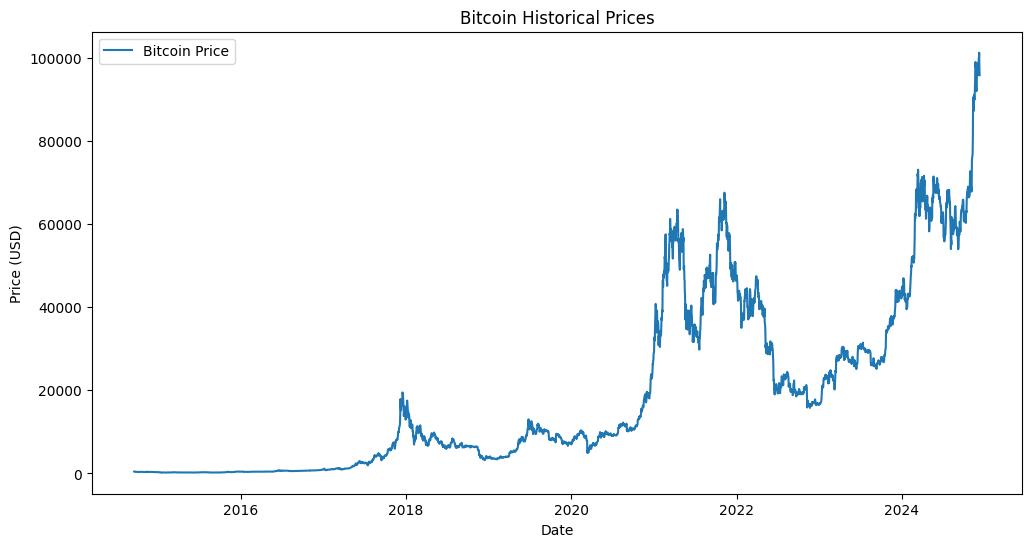

Mean Daily Return: 0.00209
Volatility (Std Dev): 0.03626
Sharpe Ratio: 0.92


[*********************100%***********************]  1 of 1 completed


Bitcoin Semiannual Prices:
2014-09-30: $386.94
2015-03-31: $244.22
2015-09-30: $236.06
2016-03-31: $416.73
2016-09-30: $609.73
2017-03-31: $1,071.79
2017-09-30: $4,338.71
2018-03-31: $6,973.53
2018-09-30: $6,625.56
2019-03-31: $4,105.40
2019-09-30: $8,293.87
2020-03-31: $6,438.64
2020-09-30: $10,784.49
2021-03-31: $58,918.83
2021-09-30: $43,790.89
2022-03-31: $45,538.68
2022-09-30: $19,431.79
2023-03-31: $28,478.48
2023-09-30: $26,967.92
2024-03-31: $71,333.65
2024-09-30: $63,329.50
2025-03-31: $95,826.95

Current Price (2024-12-10): $95,826.95



/var/folders/bk/nw4ggqtj4ws9zvsdqtkjyrhm0000gn/T/ipykernel_83327/895721320.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(btc_data['Adj Close'].iloc[-1])  # Convertir a float


In [49]:
# 5. Ejecutar el análisis
def main():
    # Obtener datos
    btc_data = get_bitcoin_data()
    
    # Calcular métricas
    metrics = calculate_metrics(btc_data)
    
    # Visualizar datos
    plot_bitcoin_prices(btc_data)
    
    # Mostrar resultados
    print(f"Mean Daily Return: {metrics['mean_return']:.5f}")
    print(f"Volatility (Std Dev): {metrics['volatility']:.5f}")
    print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")

    get_semiannual_prices()

# Ejecutar el análisis
if __name__ == "__main__":
    main()